**Project Title**

# **Image Classification with a Convolutional Neural Network (CNN) + Streamlit App**

What you will build

You will:

Load a dataset (CIFAR-10)

Preprocess the data

Build a CNN in TensorFlow/Keras

Train the model

Evaluate it (accuracy, classification report, confusion matrix)

Save the model

Build a Streamlit app to upload an image and predict the class



# **✅ Step 1 — Install required packages**

In [1]:
!pip install -q streamlit pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 73.5 MB/s eta 0:00:00


# **✅ Step 2 — Import libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import os


# **✅ Step 3 — Load the CIFAR-10 dataset**

CIFAR-10 has 60,000 images in 10 categories:

airplane, automobile, bird, cat, deer

dog, frog, horse, ship, truck

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


# **✅ Step 4 — Normalize the data**

Neural networks train better when pixel values are scaled to 0–1.

In [4]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


# **✅ Step 5 — Define class labels**

In [5]:
class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]


# **✅ Step 6 — Visualize sample images**

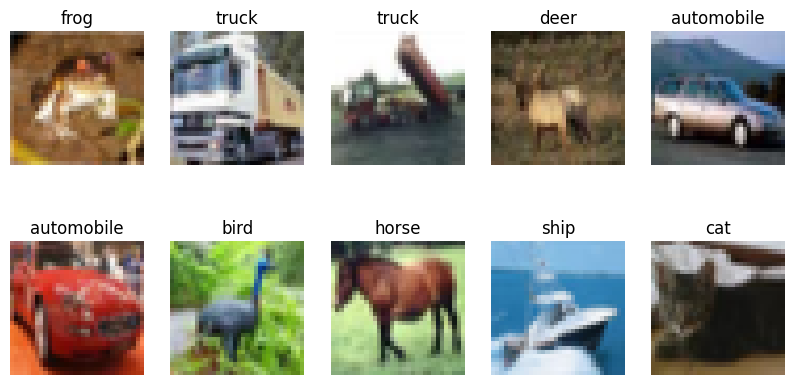

In [6]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis("off")
plt.show()


# **✅ Step 7 — Build the CNN Model**

In [7]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation="relu", input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(10, activation="softmax")
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

# **✅ Step 8 — Compile the model**

In [8]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


# **✅ Step 9 — Train the model**

In [9]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.2
)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 81ms/step - accuracy: 0.2558 - loss: 1.9757 - val_accuracy: 0.4664 - val_loss: 1.4760
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.4669 - loss: 1.4801 - val_accuracy: 0.5404 - val_loss: 1.2715
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.5328 - loss: 1.3086 - val_accuracy: 0.5662 - val_loss: 1.2173
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.5721 - loss: 1.2002 - val_accuracy: 0.6074 - val_loss: 1.1153
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 81ms/step - accuracy: 0.6011 - loss: 1.1377 - val_accuracy: 0.6333 - val_loss: 1.0550
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 81ms/step - accuracy: 0.6299 - loss: 1.0578 - val_accuracy: 0.6395 - val_loss: 1.0232
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.6483 - loss: 1.0075 - val_accuracy: 0.6536 - val_loss: 0.9879
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 85ms/step - accuracy: 0.6633 - loss: 0.9565 - 

# **✅ Step 10 — Plot training results**

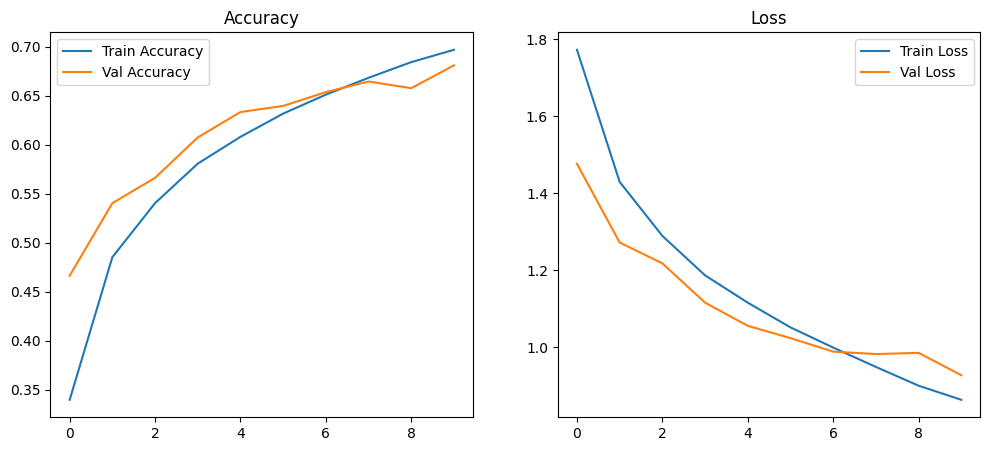

In [10]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()


# **✅ Step 11 — Evaluate the model**

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6790 - loss: 0.9227
Test Accuracy: 0.6766999959945679


# **✅ Step 12 — Predictions + Classification Report**

In [12]:
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = y_test.flatten()

print(classification_report(y_true, y_pred, target_names=class_names))


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

    airplane       0.76      0.64      0.70      1000
  automobile       0.81      0.81      0.81      1000
        bird       0.52      0.61      0.56      1000
         cat       0.49      0.43      0.46      1000
        deer       0.63      0.60      0.62      1000
         dog       0.55      0.67      0.60      1000
        frog       0.83      0.67      0.74      1000
       horse       0.68      0.77      0.72      1000
        ship       0.79      0.79      0.79      1000
       truck       0.77      0.77      0.77      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



# **✅ Step 13 — Confusion Matrix**

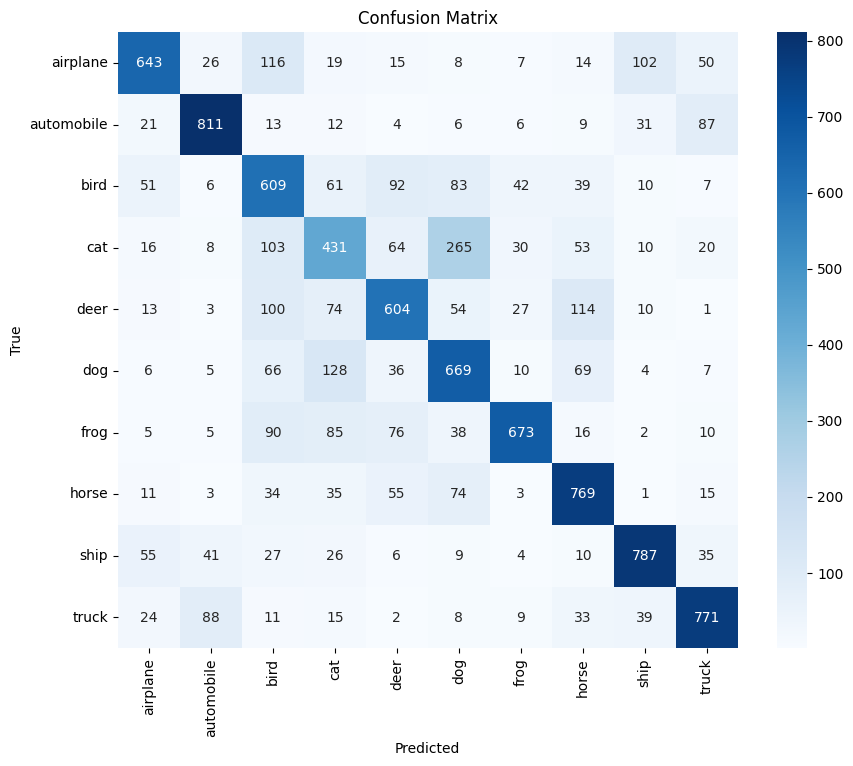

In [13]:
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


# **✅ Step 14 — Save the trained model**

In [14]:
model.save("cifar10_cnn_model.h5")
print("Model saved as cifar10_cnn_model.h5")


Model saved as cifar10_cnn_model.h5


# **2) Create an App to Display**

Colab doesn’t host apps directly like a normal server, but you can run Streamlit using ngrok.

In [15]:
%%writefile app.py
import streamlit as st
import numpy as np
import tensorflow as tf
from PIL import Image

# Load the model
model = tf.keras.models.load_model("cifar10_cnn_model.h5")

class_names = [
    "airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"
]

st.title("CIFAR-10 Image Classifier")
st.write("Upload an image and the model will predict its class.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    img = Image.open(uploaded_file).convert("RGB")
    st.image(img, caption="Uploaded Image", use_column_width=True)

    # Resize to 32x32 (CIFAR-10 input size)
    img_resized = img.resize((32, 32))
    img_array = np.array(img_resized).astype("float32") / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = class_names[np.argmax(prediction)]

    st.subheader("Prediction:")
    st.write(f"### {predicted_class}")


Writing app.py


# **✅ Step 2 — Run Streamlit in Colab**

In [16]:
!streamlit run app.py &>/content/logs.txt &


# **✅ Step 3 — Create a public URL using ngrok**

In [20]:
from pyngrok import ngrok

ngrok.set_auth_token("38VwiMXdEr8TCVT1lRDC8KpKvz7_WFLrDQSVg4pxnoPNh36w")


In [21]:
!streamlit run app.py &>/content/logs.txt &


In [22]:
public_url = ngrok.connect(8501)
print("Streamlit App URL:", public_url)


Streamlit App URL: NgrokTunnel: "https://bibulously-nonsupporting-yoko.ngrok-free.dev" -> "http://localhost:8501"
